In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [7]:
#Exploring Categories

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

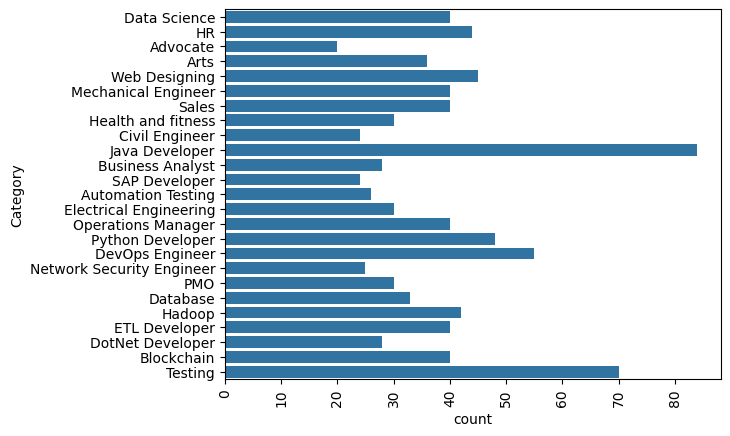

In [11]:
#plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

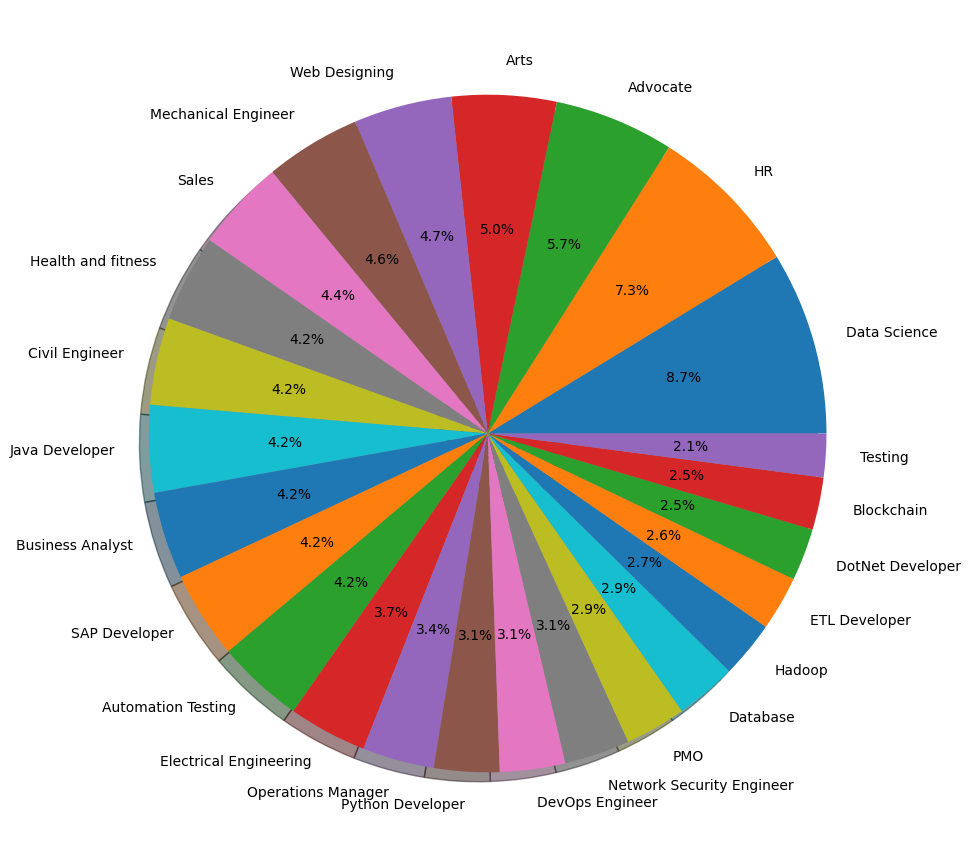

In [22]:
counts=df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,11))
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

In [25]:
df['Category'][0]

'Data Science'

In [29]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [65]:
#cleaning of data

import re

def cleanResume(txt):
    # remove urls
    cleanText = re.sub(r'http\S+', ' ', txt)
    # remove RT/cc
    cleanText = re.sub(r'\bRT\b|\bcc\b', ' ', cleanText)
    # remove hashtags
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    # remove email addresses
    cleanText = re.sub(r'\S+@\S+', ' ', cleanText)
    # remove mentions (@something but not inside words)
    cleanText = re.sub(r'@\w+', ' ', cleanText)
    # remove special characters/punctuations
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    # remove non-ASCII characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    # remove extra spaces
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    
    return cleanText

In [66]:
resume_text = "my ### #noorsaeed website like is this http://heloword and access it @gmail.com"
print(cleanResume(resume_text))


my website like is this and access it com


In [68]:
df['Resume']= df['Resume'].apply(lambda x: cleanResume(x))

In [69]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

In [70]:
#words into categories
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [73]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

In [78]:
#Vactorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df['Resume'])

In [79]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to accept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [80]:
requiredtext

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164112 stored elements and shape (962, 7346)>

In [81]:
from sklearn.model_selection import train_test_split


In [83]:
X_train , X_test , y_train, y_test = train_test_split(requiredtext, df['Category'], test_size=0.2,random_state=42)

In [85]:
X_train.shape

(769, 7346)

In [86]:
X_test.shape

(193, 7346)

In [91]:
#as it is multiclassificatiom Problem

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf= KNeighborsClassifier()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [101]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [120]:
import pickle 
pickle.dump(requiredtext, open('requiredtext.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('models/svc_model.pkl','wb'))
svc_model = pickle.load(open('models/svc_model.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'models/svc_model.pkl'

In [121]:
import pickle

#load the trained classifier
clf= pickle.load(open('clf.pkl','rb'))

#clean the input resume
import pickle 

# Load the trained TF-IDF vectorizer
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
Cleaned_resume = cleanResume(myresume)

# Transform the clean resume using the trained TF-IDF vectorizer
input_features = tfidf.transform([Cleaned_resume])  # Use Cleaned_resume here

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}

category_name = category_mapping.get(prediction_id, "Unknown")
print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: Data Science
6
